# Data Description

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not.

# Import Required Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

The above code will help me to view all the columns and rows whenever is required.

In [136]:
#importing dataset from github

df=pd.read_csv('https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/raw/master/Automobile_insurance_fraud.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


Totally, We have a 40 columns in the dataset and Fraud_Reported column is the target column.

# Checking Data type and Shape

In [34]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [35]:
df.shape

(1000, 40)

In [36]:
df=df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

From the above info - we can clearly see there is null value in _c39 columns. Hence, I decided to drop- this decision come from the above info because this column has contain  full null value.

# Checking Unique Value only in doubtfull column

In [118]:
df["collision_type"].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [119]:
df["property_damage"].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [120]:
df["police_report_available"].value_counts()

NO     343
?      343
YES    314
Name: police_report_available, dtype: int64

In [121]:
df["policy_csl"].value_counts()

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

In the above data is showig having a "?" symbol which means there is no details hence we will fill it in next step.

In [137]:
df=df.replace("?","No Details")

In [138]:
df["Policy_Month"]=pd.to_datetime(df["policy_bind_date"],format="%d-%m-%Y").dt.month
df["Policy_Year"]=pd.to_datetime(df["policy_bind_date"],format="%d-%m-%Y").dt.year
df.drop(["policy_bind_date"],axis=1,inplace=True)

In [139]:
df["Incident_Month"]=pd.to_datetime(df["incident_date"],format="%d-%m-%Y").dt.month
df["Incident_Year"]=pd.to_datetime(df["incident_date"],format="%d-%m-%Y").dt.year
df.drop(["incident_date"],axis=1,inplace=True)

In [140]:
df=df.drop(['policy_number','insured_zip','incident_location','_c39','auto_year','incident_hour_of_the_day','Incident_Year'],axis=1)
df.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'fraud_reported', 'Policy_Month', 'Policy_Year',
       'Incident_Month'],
      dtype='object')

We have successfully removed the unimportant columns from the dataset because here no use to contain the details for upcoming step.

In [126]:
df.dtypes

months_as_customer               int64
age                              int64
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
number_of_vehicles_involved      int64
property_damage                 object
bodily_injuries                  int64
witnesses                        int64
police_report_available         object
total_claim_amount       

In [141]:
df.shape

(1000, 35)

We have a 1000 rows and 35 columns in the dataset now.

# Checking Null Value

In [128]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
auto_make                      0
auto_model

We don't have a null value in the dataset. However, I will ensure with heatmap in next step.

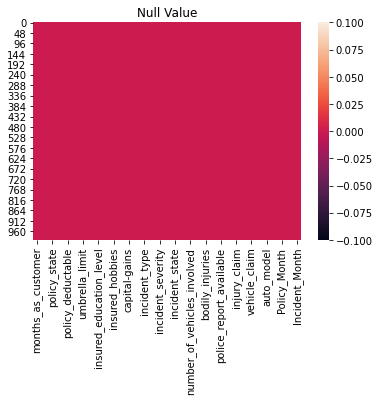

In [129]:
sns.heatmap(df.isnull())
plt.title("Null Value")
plt.show()

# Visualization of Data:

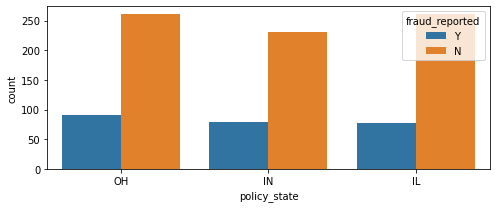

In [21]:
fig = plt.figure(figsize=(7,3))
sns.countplot('policy_state', hue='fraud_reported', data=df)
plt.tight_layout()
plt.show()

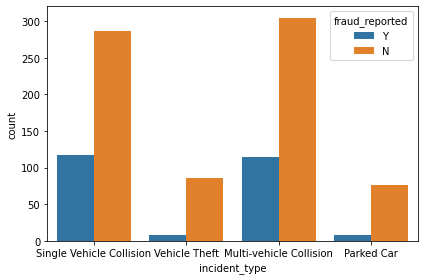

In [49]:
sns.countplot('incident_type', hue='fraud_reported', data=df)
plt.tight_layout()
plt.show()

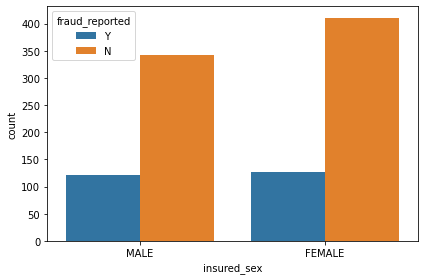

In [50]:
sns.countplot('insured_sex', hue='fraud_reported', data=df)
plt.tight_layout()
plt.show()

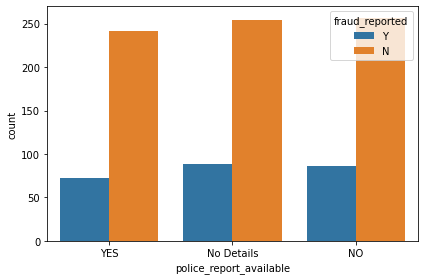

In [51]:
sns.countplot('police_report_available', hue='fraud_reported', data=df)
plt.tight_layout()
plt.show()

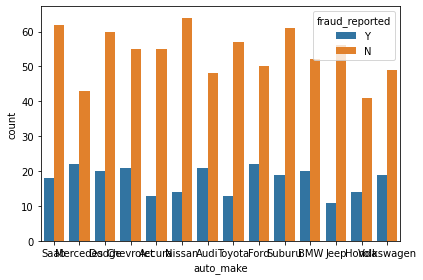

In [52]:
sns.countplot('auto_make', hue='fraud_reported', data=df)
plt.tight_layout()
plt.show()

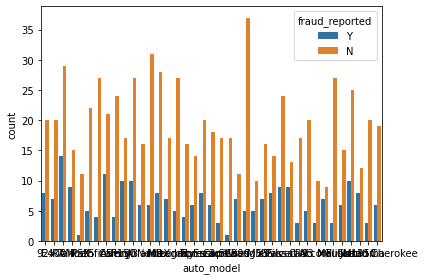

In [53]:
sns.countplot('auto_model', hue='fraud_reported', data=df)
plt.tight_layout()
plt.show()

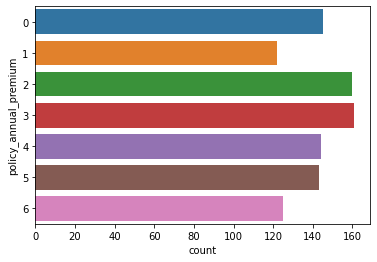

In [76]:
A=sns.countplot(y = 'insured_education_level', data=df) 
A.set_ylabel('policy_annual_premium')
plt.show()

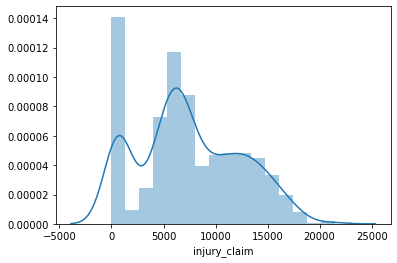

In [54]:
A=sns.distplot(df["injury_claim"],kde=True)

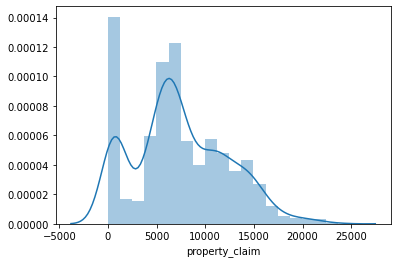

In [55]:
B=sns.distplot(df["property_claim"],kde=True)

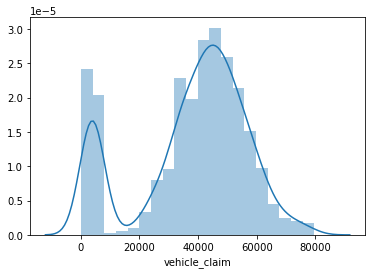

In [56]:
C=sns.distplot(df["vehicle_claim"],kde=True)

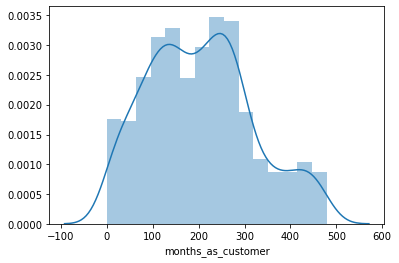

In [59]:
D=sns.distplot(df["months_as_customer"],kde=True)

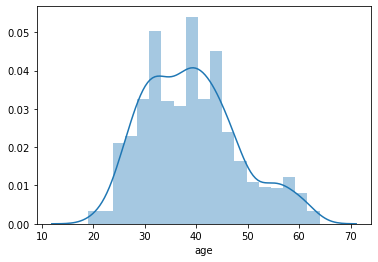

In [60]:
E=sns.distplot(df["age"],kde=True)

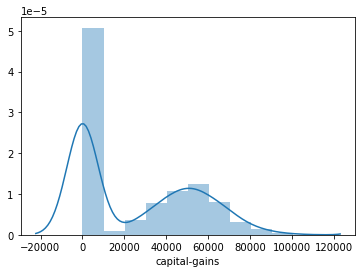

In [61]:
F=sns.distplot(df["capital-gains"],kde=True)

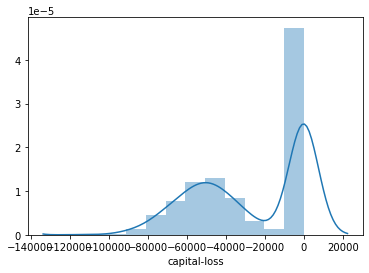

In [62]:
G=sns.distplot(df["capital-loss"],kde=True)

# Encoding the Dataframe:

In [142]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1)).astype(int)
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,Policy_Month,Policy_Year,Incident_Month
0,328,48,2,1,1000,1406.91,0,1,4,2,17,0,53300,0,2,3,0,4,4,1,1,2,1,2,2,71610,6510,13020,52080,10,1,1,10,2014,1
1,228,42,1,1,2000,1197.22,5000000,1,4,6,15,2,0,0,3,1,1,4,5,5,1,1,0,0,1,5070,780,780,3510,8,12,1,6,2006,1
2,134,29,2,0,2000,1413.14,5000000,0,6,11,2,3,35100,0,0,2,1,4,1,1,3,0,2,3,0,34650,7700,3850,23100,4,30,0,9,2000,2
3,256,41,0,1,2000,1415.74,6000000,0,6,1,2,4,48900,-62400,2,0,0,4,2,0,1,1,1,2,0,63400,6340,6340,50720,3,34,1,5,1990,1
4,228,44,0,2,1000,1583.91,6000000,1,0,11,2,4,66000,-46000,3,1,1,2,1,0,1,0,0,1,0,6500,1300,650,4550,0,31,0,6,2014,2


We are not changing all the columns for Ordinal encoder becasue we have only eighteen columns as Ordinal encoder hence we did only for that five columns.

In [143]:
df=df[['months_as_customer','age','policy_state','policy_csl','policy_deductable','policy_annual_premium', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_occupation','insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity','authorities_contacted', 'incident_state', 'incident_city','number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount','injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'Policy_Month', 'Policy_Year','Incident_Month', 'fraud_reported']]

# Describe Dataset

In [105]:
#Statistical Summary
df.describe()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,Policy_Month,Policy_Year,Incident_Month,fraud_reported
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1.01400,0.951000,1136.000000,1256.406150,1.101000e+06,0.463000,2.966000,6.653000,9.731000,2.416000,25126.100000,-26793.700000,1.172000,1.590000,1.184000,2.167000,3.242000,2.966000,1.83900,0.964000,0.992000,1.487000,0.971000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,19.318000,6.559000,2001.604000,1.496000,0.247000
std,115.113174,9.140287,0.83096,0.804516,611.864673,244.167395,2.297407e+06,0.498879,1.948497,4.019048,5.674049,1.681003,27872.187708,28104.096686,1.081474,1.141579,0.939695,1.532142,2.155942,2.044266,1.01888,0.799589,0.820127,1.111335,0.810442,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,11.136107,3.499824,7.360391,0.523697,0.431483
min,0.000000,19.000000,0.00000,0.000000,500.000000,433.330000,-1.000000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-111100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,1.000000,1990.000000,1.000000,0.000000
25%,115.750000,32.000000,0.00000,0.000000,500.000000,1089.607500,0.000000e+00,0.000000,1.000000,3.000000,5.000000,1.000000,0.000000,-51500.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,0.000000,0.000000,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,10.000000,3.000000,1995.000000,1.000000,0.000000
50%,199.500000,38.000000,1.00000,1.000000,1000.000000,1257.200000,0.000000e+00,0.000000,3.000000,7.000000,10.000000,2.000000,0.000000,-23250.000000,1.000000,2.000000,1.000000,2.000000,4.000000,3.000000,1.00000,1.000000,1.000000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,20.000000,7.000000,2002.000000,1.000000,0.000000
75%,276.250000,44.000000,2.00000,2.000000,2000.000000,1415.695000,0.000000e+00,1.000000,5.000000,10.000000,15.000000,4.000000,51025.000000,0.000000,2.000000,3.000000,2.000000,4.000000,5.000000,5.000000,3.00000,2.000000,2.000000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,29.000000,10.000000,2008.000000,2.000000,0.000000
max,479.000000,64.000000,2.00000,2.000000,2000.000000,2047.590000,1.000000e+07,1.000000,6.000000,13.000000,19.000000,5.000000,100500.000000,0.000000,3.000000,3.000000,3.000000,4.000000,6.000000,6.000000,4.00000,2.000000,2.000000,3.000000,2.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,12.000000,2015.000000,3.000000,1.000000


We have a outlier and skewness. So we will check in further step

# Correlation Checking:

In [106]:
df.corr()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,Policy_Month,Policy_Year,Incident_Month,fraud_reported
months_as_customer,1.000000,0.922098,-0.000328,-0.026819,0.026807,0.005018,0.015498,0.060925,-0.000833,0.009814,-0.093661,0.069727,0.006399,0.020209,-0.017377,-0.065432,-0.059581,0.010021,0.005369,-0.000130,0.014736,0.002309,-0.010162,0.058383,-0.055712,0.062108,0.065329,0.034940,0.061013,0.047655,0.004202,-0.001559,-0.048276,-0.042826,0.020544
age,0.922098,1.000000,-0.014533,-0.015185,0.029188,0.014404,0.018126,0.073337,0.000969,0.017220,-0.081315,0.074832,-0.007075,0.007368,-0.025626,-0.071117,-0.058439,0.015417,0.005770,-0.002291,0.022102,-0.004365,-0.015679,0.052359,-0.049797,0.069863,0.075522,0.060898,0.062588,0.030410,0.017343,0.008357,-0.037444,-0.037058,0.012143
policy_state,-0.000328,-0.014533,1.000000,0.001027,0.010033,0.012455,-0.029580,-0.020481,-0.034327,-0.031215,-0.038689,-0.018506,0.074551,-0.030338,0.031848,0.057763,-0.026377,-0.016777,0.008723,-0.002077,-0.042263,-0.023346,0.013384,0.022960,0.046682,-0.006002,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.046871,-0.007276,0.018531,0.029432
policy_csl,-0.026819,-0.015185,0.001027,1.000000,0.003384,0.023978,0.021636,-0.010757,0.009153,0.015788,-0.005960,-0.030063,0.005249,-0.034612,0.011997,-0.004458,0.022530,0.056182,0.032814,0.009333,-0.019403,-0.019862,-0.000595,0.071500,-0.005252,-0.055758,-0.078818,-0.042216,-0.046791,-0.004701,0.047885,-0.021547,-0.016466,-0.030164,-0.037190
policy_deductable,0.026807,0.029188,0.010033,0.003384,1.000000,-0.003245,0.010870,-0.009733,0.015217,-0.046733,0.004061,-0.022945,0.035212,-0.023544,-0.038411,-0.054085,-0.015711,-0.000760,0.006517,-0.045117,0.051214,0.010017,-0.022765,0.066639,0.035213,0.022839,0.039107,0.064792,0.005269,-0.035379,-0.003268,-0.025020,-0.049598,-0.026416,0.014817
policy_annual_premium,0.005018,0.014404,0.012455,0.023978,-0.003245,1.000000,-0.006247,0.038853,-0.019715,0.035922,-0.018019,0.001925,-0.013738,0.023547,0.053603,0.037877,-0.011155,-0.055191,0.046434,0.048724,-0.045991,0.042314,0.026780,0.002332,0.024188,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.002480,0.001249,-0.046097,-0.014480
umbrella_limit,0.015498,0.018126,-0.029580,0.021636,0.010870,-0.006247,1.000000,0.010688,-0.019357,0.023422,-0.037000,0.077495,-0.047268,-0.024056,0.015966,-0.003279,0.009466,0.029044,-0.077492,0.013094,-0.021270,-0.073762,0.022743,-0.006738,-0.021005,-0.040344,-0.045412,-0.023790,-0.038584,-0.004443,0.040256,-0.045871,0.048008,-0.002576,0.058622
insured_sex,0.060925,0.073337,-0.020481,-0.010757,-0.009733,0.038853,0.010688,1.000000,0.009002,-0.006160,-0.020317,0.002855,-0.020494,-0.021705,0.009952,-0.021391,-0.028168,0.017914,-0.022379,0.014470,0.018793,0.016733,-0.020297,0.042463,-0.008846,-0.023727,0.000924,-0.014868,-0.029609,0.026457,-0.018421,-0.001042,-0.032891,-0.025471,0.030873
insured_education_level,-0.000833,0.000969,-0.034327,0.009153,0.015217,-0.019715,-0.019357,0.009002,1.000000,-0.020298,0.021807,-0.023488,0.039912,0.041193,0.013704,-0.008073,-0.006420,-0.010838,-0.005903,-0.018636,-0.003768,-0.058611,-0.012072,0.019211,0.052622,0.074226,0.081880,0.055794,0.068348,0.055202,0.049445,-0.082494,0.018952,-0.053106,0.008808
insured_occupation,0.009814,0.017220,-0.031215,0.015788,-0.046733,0.035922,0.023422,-0.006160,-0.020298,1.000000,-0.011077,-0.010171,-0.007824,-0.020171,0.003842,0.007141,0.004731,-0.007811,-0.022761,0.000390,-0.015368,-0.039090,-0.000236,-0.014794,-0.032288,0.003692,0.020211,0.003004,-0.000829,0.042621,0.020584,-0.010890,-0.0

Correlation using heatmap

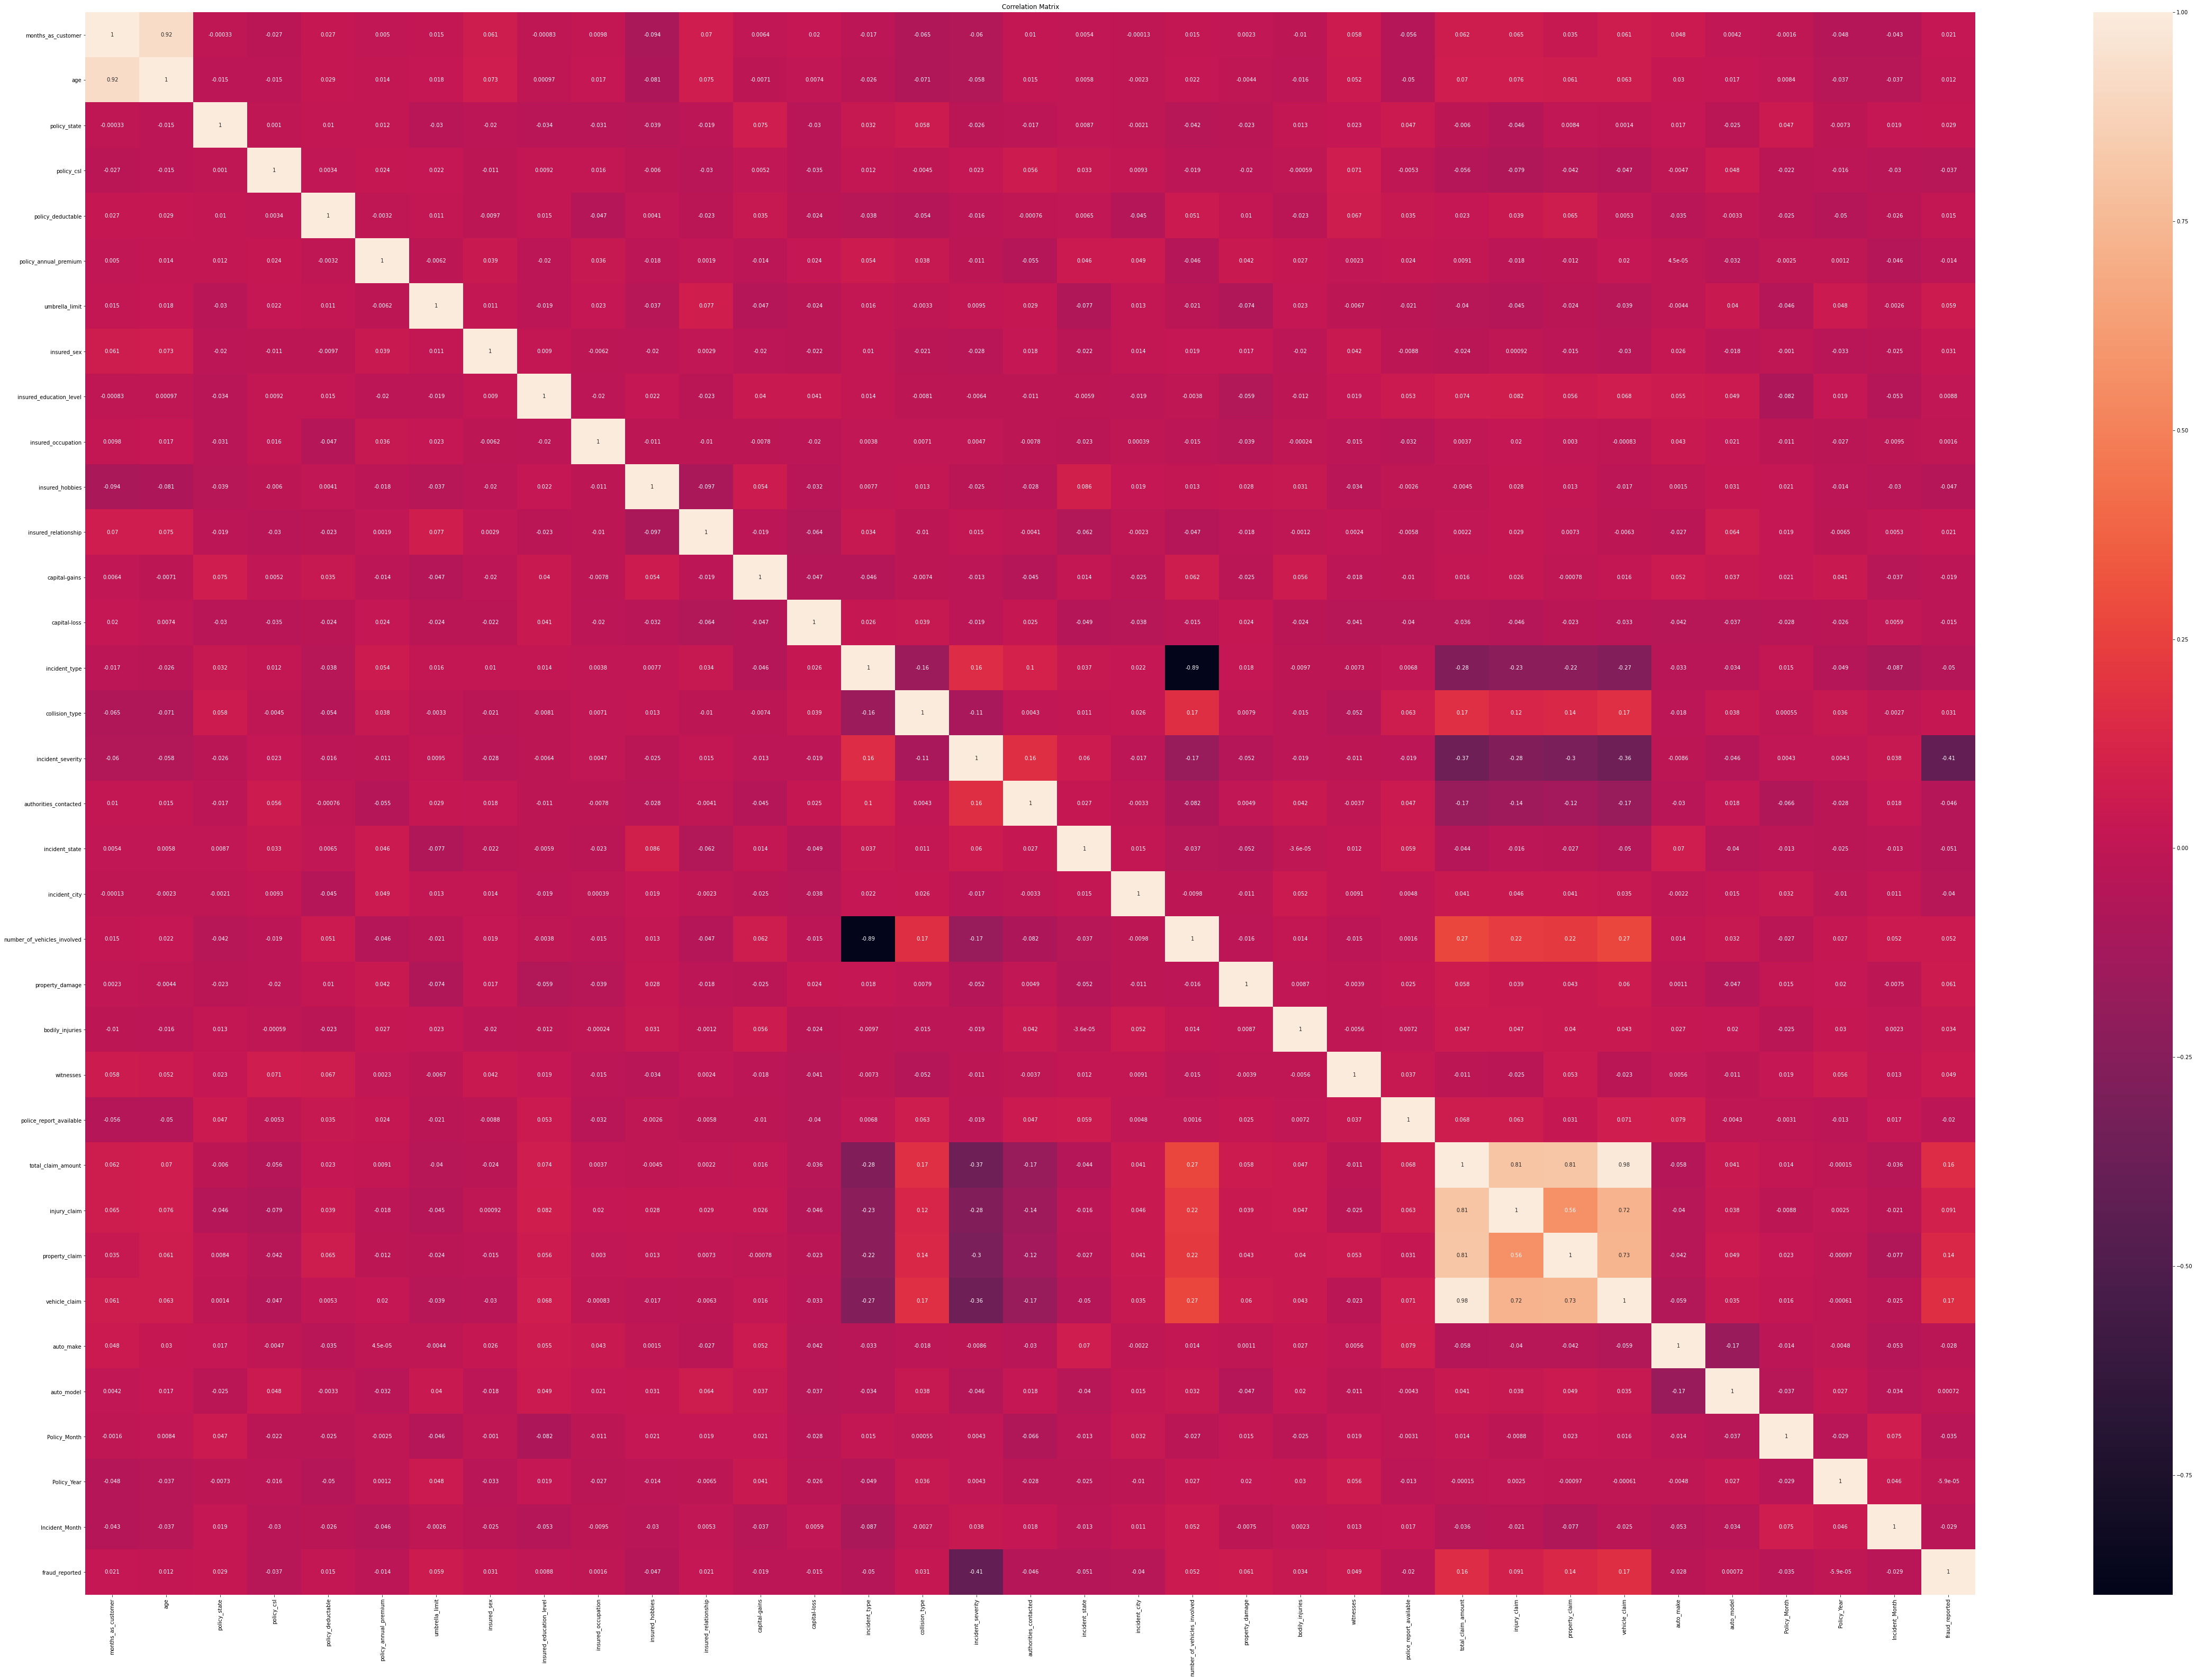

In [107]:
corr_mat=df.corr()
plt.figure(figsize=[80,55])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

# Outlier Checking 

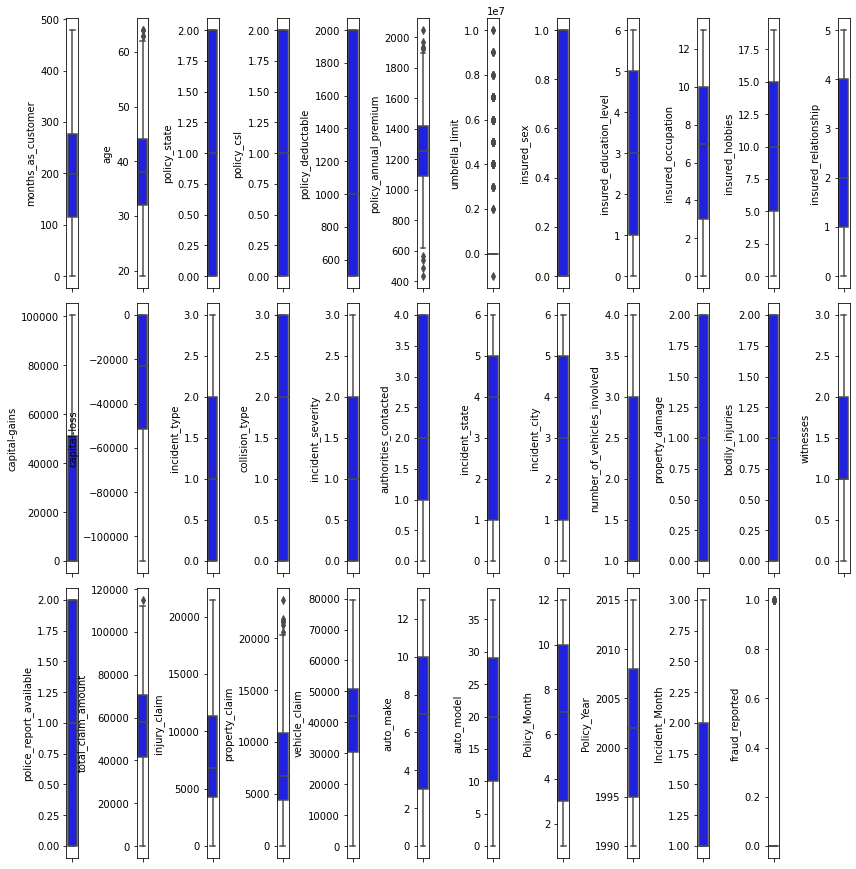

In [108]:
collist=df.columns.values
ncol=12
nrow=6
plt.figure(figsize=(ncol,2*ncol))
for i in range (0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(df[collist[i]],color='blue',orient='v')
    plt.tight_layout()

In the above - we have a outlier in six columns which are 'policy_annual_premium','umberla_limit','property_claim'. So, we will rectify in further step

# Checking Skewness

In [109]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                -0.177814
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
number_of_vehicles_involved    0.502664
property_damage                0.064799
bodily_injuries                0.014777
witnesses                      0.019636
police_report_available        0.052967


We can consider the -/+.5 is standard point. Based on that we have skewness here. let me explain.

Umberla_limit
Vechile_claim
Fraud_Reported

# Data Cleaning

# Removing Outlier

In [144]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
print(np.where(z>3))

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
       657, 700, 763, 807, 875, 922, 975], dtype=int64), array([ 6,  6,  6,  6,  6,  5,  5,  6,  6,  6,  6, 27,  6,  6,  6,  5, 13,
        6,  6,  6], dtype=int64))


In [145]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(1000, 35)
(980, 35)


In [146]:
Loss_percentage=(1000-980)/1000*100
print(Loss_percentage)

2.0


Actually, We are having a 2%(rounded Off) dataloss in the dataset which are good to go for further step.

In [147]:
X=df_new.iloc[:,:-1]
Y=df_new.iloc[:,-1]

We are spliting the dataset which are X is feature and Y is target.

In [148]:
X.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'Policy_Month', 'Policy_Year', 'Incident_Month'],
      dtype='object')

# Data Transform for Remove Skewness

In [149]:
from sklearn.preprocessing import power_transform
DF=power_transform(X,method='yeo-johnson')
DF=pd.DataFrame(DF,columns=X.columns)

# Finding the Model and Random State:

In [150]:
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
x=SC.fit_transform(DF)

In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range (0,100):
    x_train,x_test,Y_train,Y_test = train_test_split(x,Y,test_size=.25,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,Y_train)
    predrf=LR.predict(x_test)
    acc = accuracy_score(Y_test, predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy is",maxAccu*100,"on Random state",maxRS)

Best Accuracy is 83.26530612244898 on Random state 63


I have created the test size for 83% to find the best random state and Accuracy score. Finally, We got 84% accuracy score and Random state is 63.

# Creating Train-Test Split

In [155]:
x_train,x_test,Y_train,Y_test = train_test_split(x,Y,test_size=.30,random_state=63)

In [157]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

LR = LogisticRegression()
LR.fit(x_train,Y_train)
pred=LR.predict(x_test)
print (accuracy_score(Y_test, pred))
print (confusion_matrix(Y_test, pred))
print (classification_report(Y_test, pred))

0.8333333333333334
[[214  20]
 [ 29  31]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       234
           1       0.61      0.52      0.56        60

    accuracy                           0.83       294
   macro avg       0.74      0.72      0.73       294
weighted avg       0.82      0.83      0.83       294



In [158]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(x_train,Y_train)
prid=DT.predict(x_test)
print (accuracy_score(Y_test, prid))
print (confusion_matrix(Y_test, prid))
print (classification_report(Y_test, prid))

0.7755102040816326
[[199  35]
 [ 31  29]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       234
           1       0.45      0.48      0.47        60

    accuracy                           0.78       294
   macro avg       0.66      0.67      0.66       294
weighted avg       0.78      0.78      0.78       294



In [159]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(x_train,Y_train)
predi=RF.predict(x_test)
print (accuracy_score(Y_test, predi))
print (confusion_matrix(Y_test, predi))
print (classification_report(Y_test, predi))

0.826530612244898
[[223  11]
 [ 40  20]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       234
           1       0.65      0.33      0.44        60

    accuracy                           0.83       294
   macro avg       0.75      0.64      0.67       294
weighted avg       0.81      0.83      0.80       294



In [160]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,Y_train)
prd=svc.predict(x_test)
print (accuracy_score(Y_test, prd))
print (confusion_matrix(Y_test, prd))
print (classification_report(Y_test, prd))

0.8129251700680272
[[223  11]
 [ 44  16]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       234
           1       0.59      0.27      0.37        60

    accuracy                           0.81       294
   macro avg       0.71      0.61      0.63       294
weighted avg       0.79      0.81      0.78       294



Random Forest score is - 83%
Decision Tree score is - 78%
Logistic Regression Score is - 83%
SVC score is - 81%
We are getting the high accuracy with Logistic Regression model is 83%. It will be cross check with CV.

# Finding the best CV value:

In [161]:
from sklearn.model_selection import cross_val_score
for j in range (2,6):
    cv_score=cross_val_score(LR,x,Y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At score fold {j} is having the CV_Score is {cv_mean*100}")

At score fold 2 is having the CV_Score is 79.18367346938776
At score fold 3 is having the CV_Score is 77.65520346710191
At score fold 4 is having the CV_Score is 78.97959183673468
At score fold 5 is having the CV_Score is 78.77551020408163


Based on the above high score of Loistic Regression. I have runned with LR to find best cv value. Here, I choosed cv=5 is best. Hence. will check the cross validation other model.

In [162]:
from sklearn.model_selection import cross_val_score

score=cross_val_score(LR,x,Y,cv=5)
scr=cross_val_score(DT,x,Y,cv=5)
sc=cross_val_score(RF,x,Y,cv=5)
scor=cross_val_score(svc,x,Y,cv=5)
print("Cross Validation Score of LR :",score.mean()*100)
print("Cross Validation Score of DT :",scr.mean()*100)
print("Cross Validation Score of RF :",sc.mean()*100)
print("Cross Validation Score of svc :",scor.mean()*100)

Cross Validation Score of LR : 78.77551020408163
Cross Validation Score of DT : 75.81632653061224
Cross Validation Score of RF : 76.0204081632653
Cross Validation Score of svc : 76.42857142857142


Minimum Difference in accuracy and cross_validation score is for Decision Tree is (2%). So, this is best model

# AUC ROC Curve:

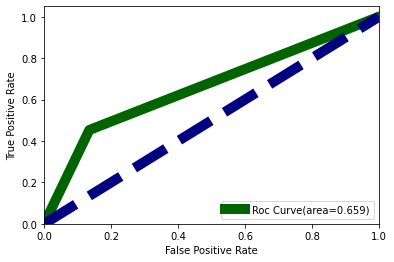

In [163]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(prid,Y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color="darkgreen",lw=10,label='Roc Curve(area=%0.3f)'%roc_auc)
plt.plot([0,1],[0,1],color="navy",lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

# Hyper Parameter Tuning

In [164]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': np.arange(2,15),
             'criterion':['gini','entropy']}
GCV=GridSearchCV(DT,parameters,cv=5)
GCV.fit(x_train,Y_train)
print(GCV.best_params_)

{'criterion': 'gini', 'max_depth': 4}


In [165]:
DT=DecisionTreeClassifier(criterion="gini",max_depth=4)
DT.fit(x_train,Y_train)
DT.score(x_train,Y_train)
predict=DT.predict(x_test)
AC=accuracy_score(Y_test,predict)
print("DecisionTree Score :",AC*100)

cv_score=cross_val_score(DT,x,Y,cv=5)
cv_mean=cv_score.mean()
print("CV Score :",cv_mean*100)

DecisionTree Score : 84.6938775510204
CV Score : 80.61224489795919


# Model Saving

In [166]:
import pickle
filename='Fraud_Claim_Prediction.pkl'
pickle.dump(RF,open(filename,'wb'))

# Conclusion

In [167]:
Loaded_load = pickle.load(open('Fraud_Claim_Prediction.pkl','rb'))
Result=Loaded_load.score(x_test,Y_test)
print(Result)

0.826530612244898


In [168]:
Conclusion=pd.DataFrame([Loaded_load.predict(x_test)[:],predict[:]],index=["Predicted","Original"])
Conclusion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293
Predicted,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
Original,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,1,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0


We have a the outcome for this model with 83%(rounded Off) score.